In [1]:
%pylab inline
import torch
import numpy

Populating the interactive namespace from numpy and matplotlib


# Сделаем данные, которые будем востанавливать
Для начала предлагается взять $sin(x)$ с шумом как нелинейную функцию для демонстрации мощи нейронных сетей.

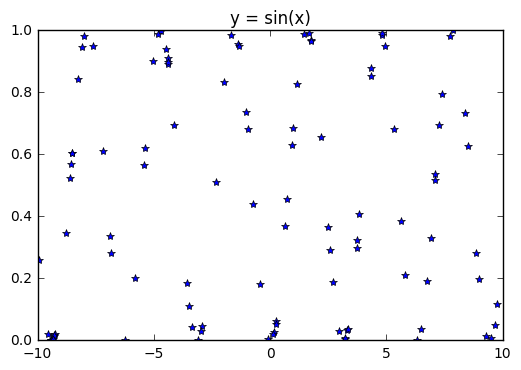

In [2]:
x = numpy.random.rand(100) 
x = x * 20.0 - 10.0# <- x распределен от -10 до 10 равномерно
y = numpy.sin(x) ** 2
plot(x, y, '*')
title('y = sin(x)')

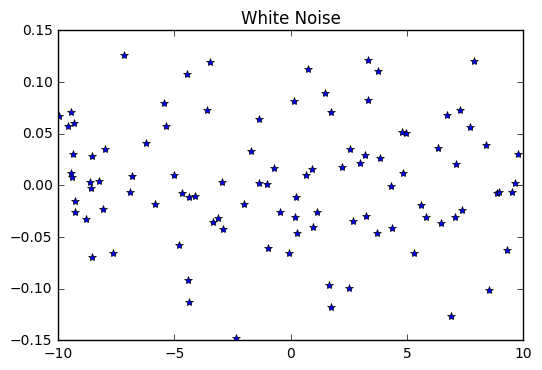

In [3]:
noise = numpy.random.randn(*y.shape)
noise = 0.1 / numpy.linalg.norm(noise) * numpy.linalg.norm(y) * noise # 10% шума
plot(x, noise, '*')
title('White Noise')

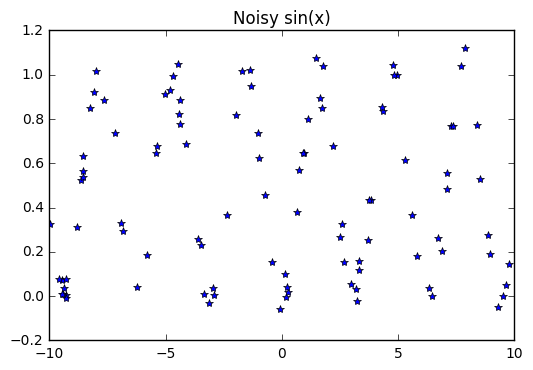

In [4]:
y_noisy = y + noise
plot(x, y_noisy, '*')
title('Noisy sin(x)')

Мы будем восстанавливать $y$ по $x$

# Создание модели

In [47]:
class SineNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(SineNet, self).__init__()
        self.fc1 = torch.nn.Linear(1, n_hidden_neurons)
        self.act1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, 1)
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        return x
    
sine_net = SineNet(1000)

(100,)
(100,)
(100, 1)


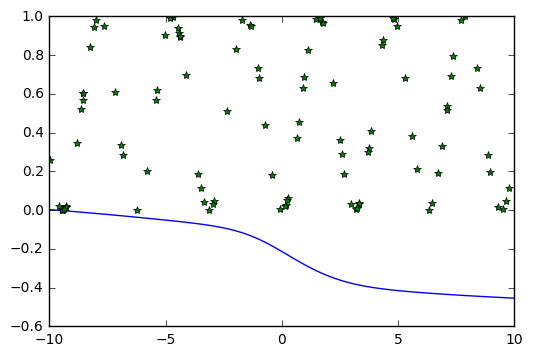

In [48]:
# Что выдает нетренированная сеть
x_valid = linspace(-10, 10, 100)
x_valid = x_valid.reshape([-1, 1])
x_t = torch.FloatTensor(x_valid)
x_var = torch.autograd.Variable(x_t)
y_pred = sine_net.forward(x_var) # Прогноз
y_pred = y_pred.data.numpy()
print x.shape
print y.shape
print y_pred.shape
plot(x_valid, y_pred)
plot(x, y, '*')

In [49]:
# Определяем loss
def loss(pred, targ):
    res = (pred - targ) ** 2
    return res.mean()

In [50]:
# Выбираем оптимизатор
import torch.optim

optimizer = torch.optim.Adam(sine_net.parameters(), lr=1.0e-1)

In [51]:
# One epoch
batch_size = 100

order = numpy.random.permutation(x.size)

for start_index in range(0, x.size, batch_size):
    
    optimizer.zero_grad()
    
    batch_items = order[start_index:start_index+batch_size]
    x_batch = torch.FloatTensor(x[batch_items].reshape([-1, 1]))
    y_batch = torch.FloatTensor(y_noisy[batch_items].reshape([-1, 1]))
    
    x_var = torch.autograd.Variable(x_batch)
    y_var = torch.autograd.Variable(y_batch)
    
    y_pred = sine_net.forward(x_var)
    loss_val = loss(y_pred, y_var)
    
    loss_val.backward()
    
    optimizer.step()
    
#     print x_batch.shape, y_batch.shape

(100,)
(100,)
(100, 1)


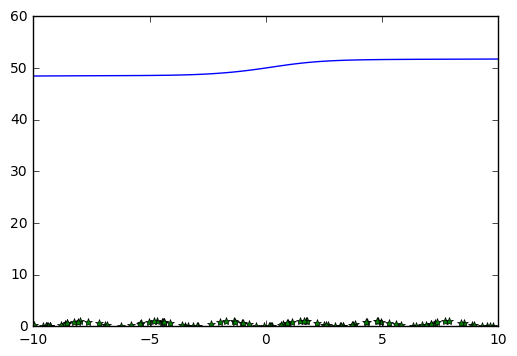

In [52]:
# Что выдает тренированная сеть
x_valid = linspace(-10, 10, 100)
x_valid = x_valid.reshape([-1, 1])
x_t = torch.FloatTensor(x_valid)
x_var = torch.autograd.Variable(x_t)
y_pred = sine_net.forward(x_var) # Прогноз
y_pred = y_pred.data.numpy()
print x.shape
print y.shape
print y_pred.shape
plot(x_valid, y_pred)
plot(x, y, '*')

In [55]:
# Several epochs
batch_size = 100

for epoch_index in range(10000):
    order = numpy.random.permutation(x.size)

    for start_index in range(0, x.size, batch_size):
    
        optimizer.zero_grad()
    
        batch_items = order[start_index:start_index+batch_size]
        x_batch = torch.FloatTensor(x[batch_items].reshape([-1, 1]))
        y_batch = torch.FloatTensor(y_noisy[batch_items].reshape([-1, 1]))
    
        x_var = torch.autograd.Variable(x_batch)
        y_var = torch.autograd.Variable(y_batch)
    
        y_pred = sine_net.forward(x_var)
        loss_val = loss(y_pred, y_var)
    
        loss_val.backward()
    
        optimizer.step()
    
#     print x_batch.shape, y_batch.shape

(100,)
(100,)
(100, 1)


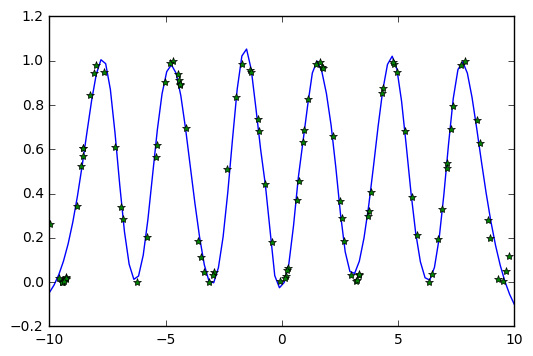

In [56]:
# Что выдает тренированная сеть
x_valid = linspace(-10, 10, 100)
x_valid = x_valid.reshape([-1, 1])
x_t = torch.FloatTensor(x_valid)
x_var = torch.autograd.Variable(x_t)
y_pred = sine_net.forward(x_var) # Прогноз
y_pred = y_pred.data.numpy()
print x.shape
print y.shape
print y_pred.shape
plot(x_valid, y_pred)
plot(x, y, '*')

# Задание 1

Сделайте обучение на зашумленных данных и посмотрите, насколько зависимость от незашумленных данных.
Доп задание: обоснуйте, что в данном случае использование метода наименьших квадратов статистически корректно. Привидите пример шума, когда использование метода наименьших квадратов (MSE как функции ошибки) статистически необоснованно.

# Задание 2
Уменьшите количество данных (в случае с зашумленными данными) до 1) 100 точек 2) 20 точек. Что происходит с моделью? Она все еще работоспособна?

# Задание 3
Проделайте то же самое для функции $(\sin x)^2$ и для функции $1 / (\sin x)^2$. Почему в последнем случае не получается ничего хорошего?